Pour generer nos datasets pickle et entrainer le modele il faut faire:

In [ ]:
from Models import ClassificationModel

Cmodel = ClassificationModel()
Cmodel.extractData()
Cmodel.createModel()
Cmodel.train()

Il est aussi possible de continuer d'entrener un modele deja sauvegardé precedement.

In [ ]:
Cmodel = ClassificationModel()
Cmodel.loadData()
Cmodel.loadModel()
Cmodel.train()

In [3]:
from Training import evaluate

Cmodel = ClassificationModel()
Cmodel.loadData()
Cmodel.loadModel()
evaluate(Cmodel)

Test loss: 0.17818379402160645 / Test accuracy: 0.9198606014251709


Notre modele de classification arrive a avoir 91% de precision ce qui est vraiment tres bien.

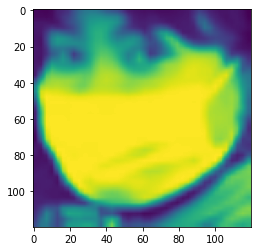

In [28]:
import matplotlib.pyplot as plt

plt.imshow(Cmodel.X_test[1])

Exemple d'une predition du modele de classification pour une image avec un masque

In [29]:
Cmodel.predict(Cmodel.X_test[1])

('Mask', array([[1.0000000e+00, 6.0228587e-09]], dtype=float32))

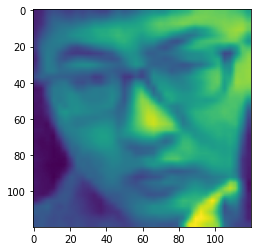

In [18]:
plt.imshow(Cmodel.X_test[16])

Exemple d'une predition du modele de classification pour une image sans masque

In [19]:
Cmodel.predict(Cmodel.X_test[16])

('Nude', array([[0.00605881, 0.9939412 ]], dtype=float32))

Le model de localisation s'utilise exactement de la même façon que celui de classification.

Notre modele de localisation a été pensé pour detecter un visage pas image et ne fonctionne donc pas avec des groupes de personnes.

In [20]:
from Models import LocalisationModel

Lmodel = LocalisationModel()
Lmodel.loadData()
Lmodel.loadModel()
evaluate(Lmodel)

Test loss: 87.91552734375 / Test accuracy: 0.800000011920929


Avec ce model on arrive a 87.9 d'Erreur quadratique moyenne ce qui est peu mais suffisament pour fausser quelques resultats.

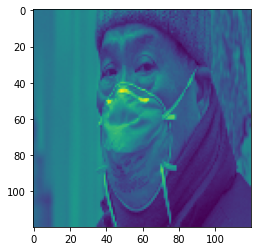

In [56]:
plt.imshow(Lmodel.X_test[13])

Exemple de prediction d'une bounding box d'un visage

In [57]:
bbox = Lmodel.predict(Lmodel.X_test[13])
print(bbox)

[37, 33, 82, 92]


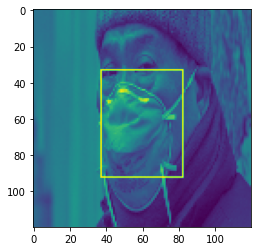

In [58]:
import cv2
rect = cv2.rectangle(Lmodel.X_test[13],(bbox[0],bbox[1]),(bbox[2],bbox[3]), (255, 0, 0), 1)
plt.imshow(rect)

Exemple de prediction d'une classe et de la localisation d'un visage avec un masque

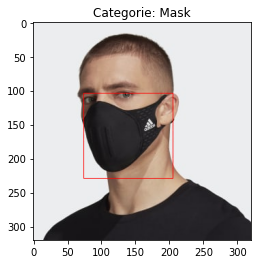

In [63]:
from Training import predict
predict("exemples/mask.png",mode="categories")

Exemple de prediction des probalitités des classes et de la localisation d'un visage sans masque

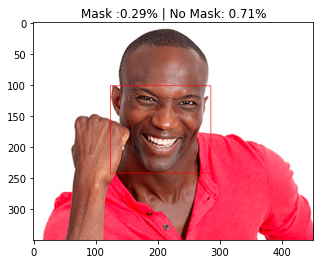

In [61]:
predict("exemples/no_mask.png")